In [1]:
import re
import numpy as np
import matplotlib.pyplot as plt

def parse_file(file):
    data = []
    with open(file, 'r') as f:
        for line in f:
            # match the line against the regular expression
            match = re.match(r'\[STAT\]\s+(\d+)\s+x\s+(\d+)\s+\[(\d+\.\d+)%\]', line)
            # if the line matches the regular expression
            if match:
                # get the length from the second group and the number of chains from the first group
                length = int(match.group(2))
                num_chains = int(match.group(1))
                # add the data to the list
                data.append([length, num_chains])
    return np.array(data)



In [6]:
def plot_histogram(data):
    plt.hist(data[:,0], bins=np.arange(min(data[:,0]), max(data[:,0])+2, 2), weights=data[:,1], edgecolor='black', color='#1f77b4')
    plt.xlabel('Chain length', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Histogram of Chain Lengths', fontsize=16)
    plt.grid(linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [4]:
def plot_histogram(data):
    # Plot the histogram of the chain lengths
    plt.hist(data[:,0], bins=max(data[:,0]), weights=data[:,1], edgecolor='black')
    plt.xlabel('Chain length')
    plt.ylabel('Frequency')
    plt.title('Histogram of Chain Lengths')
    plt.show()



In [18]:
"""
This file contains some useful functions for plotting
"""
import numpy as np

def yticksPower2(ax, step=1):
    """
    This function set the yticks to be power of 2
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to be modified
    step : int
        The step between two ticks
    """
    ylim = ax.get_ylim()
    yrange = np.arange(int(np.log2(ylim[0])), int(np.log2(ylim[1]))+1,step );
    yticks = [ np.power(2.0,i) for i in yrange]
    ax.set_yticks(yticks)
    ytickLabels = [ '$2^{%d}$'% i for i in yrange]
    ax.set_yticklabels(ytickLabels,fontsize=10, color='k')

def xticksPower2(ax):
    """
    This function set the xticks to be power of 2
    Parameters
    ----------
    ax : matplotlib.axes.Axes
        The axes to be modified
    """
    xlim = ax.get_xlim()
    xrange = range(int(np.log2(xlim[0])), int(np.log2(xlim[1]))+1 );
    xticks = [ np.power(2.0,i) for i in xrange]
    ax.set_xticks(xticks)
    xtickLabels = [ '$2^{%d}$'% i for i in xrange]
    ax.set_xticklabels(xtickLabels, fontsize=10, color='k')

    


In [35]:
import pandas as pd 

2D_VisualSim_10M
9999999
Total number of chains:  4362309


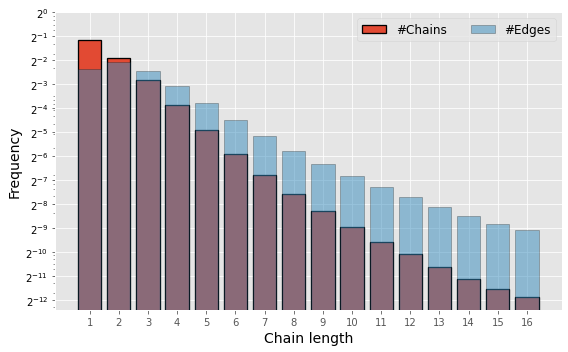

In [64]:

def plotStats(statsFile, ln=16):
    base_file_name = statsFile.split('/')[-1].split('.')[0]
    print(base_file_name)
    data = parse_file(statsFile)

    # use ggplot style for more sophisticated visuals
    plt.style.use('ggplot')
    fig,ax = plt.subplots(figsize=(8,5))
    
    totalChains = np.sum(data[:,1])
    edgeinChains = data[:,0]*data[:,1]
    totalEdge = np.sum(edgeinChains)
    print(totalEdge)
    print('Total number of chains: ', totalChains)


    ax.bar(data[0:ln,0], data[0:ln,1]/totalChains, edgecolor='k', lw=1.3)
    ax.bar(data[0:ln,0], edgeinChains[0:ln]/totalEdge, edgecolor='k', lw=.5, alpha=0.5)
    ax.set_ylabel('Frequency', fontsize=14, color = 'k')
    ax.set_xlabel('Chain length', fontsize=14, color = 'k')
    ax.set_xticks(data[0:ln,0],color='k')
    ax.legend(['#Chains', '#Edges'], fontsize=12,ncol=2, loc='upper right')
    ax.semilogy()
    yticksPower2(ax)
    plt.tight_layout()
    plt.savefig(base_file_name + '-stats.pdf')

    plt.show()

statsFile = 'stats/2D_VisualSim_10M.arborx_minpts2_stats.log'
plotStats(statsFile)

hacc_37M
36902718
Total number of chains:  1335662


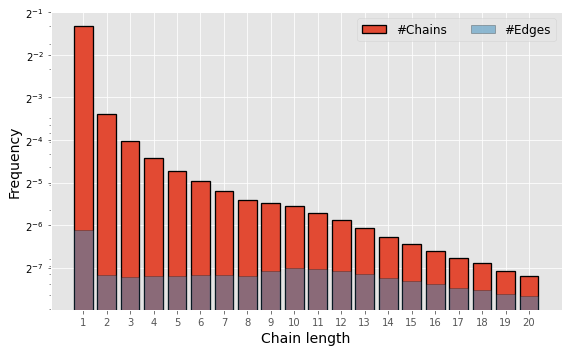

In [58]:
statsFile = 'stats/hacc_37M.arborx_minpts10_stats.log'
plotStats(statsFile)

3DRoadNetwork
434874
Total number of chains:  181532


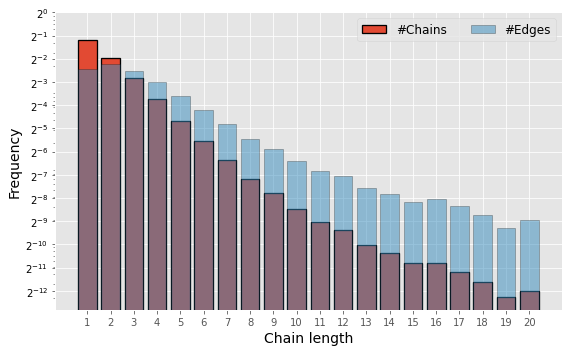

In [60]:
statsFile = 'stats/3DRoadNetwork.arborx_minpts2_stats.log'
plotStats(statsFile)

In [63]:
# compute the average chain length
avg_chain_length = np.average(data[:,0], weights=data[:,0]*data[:,1])
avg_chain_length

259.9949864994986

In [62]:
avg_chain_length

2.2923637458969552

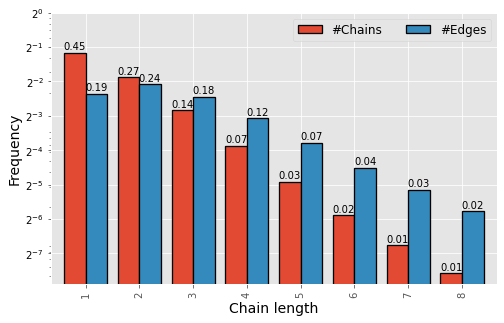

In [71]:
dxy =  np.array([data[:,1]/totalChains, edgeinChains/totalEdge]).T 
# plt.bar(dxy[0:20], edgecolor='k', lw=1.3)
df = pd.DataFrame(dxy, index=data[:,0], columns=['#Chains', '#Edge'])
fig,ax = plt.subplots(figsize=(8,5))
df[0:8].plot.bar(ax=ax, width=0.8, edgecolor='k', lw=1.3)
ax.set_ylabel('Frequency', fontsize=14, color = 'k')
ax.set_xlabel('Chain length', fontsize=14, color = 'k')
for patch in ax.patches:
    # annotate the bar with the height
    height = patch.get_height()
    ax.annotate('{:.2f}'.format(height), xy=(patch.get_x() + patch.get_width() / 2., height),
                xytext=(0, 1), textcoords="offset points", ha='center', va='bottom', fontsize=10)
# ax.set_xticks(data[0:ln,0])
ax.legend(['#Chains', '#Edges'], fontsize=12,ncol=2, loc='upper right')
ax.semilogy()
yticksPower2(ax)
# dxy[0:20]

3DRoadNetwork-arborx_minpts2_stats
434874
Total number of chains:  181532


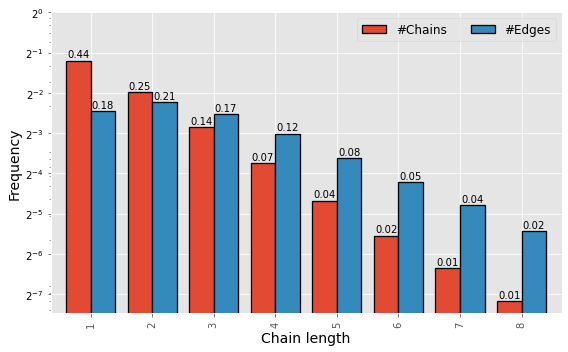

In [85]:

def plotStatsGrouped(statsFile, ln=16):
    base_file_name = "-".join(statsFile.split('/')[-1].split('.')[0:2])
    print(base_file_name)
    data = parse_file(statsFile)

    # use ggplot style for more sophisticated visuals
    plt.style.use('ggplot')
    # fig,ax = plt.subplots(figsize=(8,5))
    
    totalChains = np.sum(data[:,1])
    edgeinChains = data[:,0]*data[:,1]
    totalEdge = np.sum(edgeinChains)
    print(totalEdge)
    print('Total number of chains: ', totalChains)
    dxy =  np.array([data[:,1]/totalChains, edgeinChains/totalEdge]).T 
    # plt.bar(dxy[0:20], edgecolor='k', lw=1.3)
    df = pd.DataFrame(dxy, index=data[:,0], columns=['#Chains', '#Edge'])
    fig,ax = plt.subplots(figsize=(8,5))
    df[0:ln].plot.bar(ax=ax, width=0.8, edgecolor='k', lw=1.3)
    ax.set_ylabel('Frequency', fontsize=14, color = 'k')
    ax.set_xlabel('Chain length', fontsize=14, color = 'k')
    for patch in ax.patches:
        # annotate the bar with the height
        height = patch.get_height()
        ax.annotate('{:.2f}'.format(height), xy=(patch.get_x() + patch.get_width() / 2., height),
                    xytext=(0, 1), textcoords="offset points", ha='center', va='bottom', fontsize=10)
    # ax.set_xticks(data[0:ln,0])
    ax.legend(['#Chains', '#Edges'], fontsize=12,ncol=2, loc='upper right')
    ax.semilogy()
    yticksPower2(ax)
    plt.tight_layout()
    plt.savefig(base_file_name + '-Gr.pdf')
    # dxy[0:20]

statsFile = 'stats/3DRoadNetwork.arborx_minpts2_stats.log'
plotStatsGrouped(statsFile,ln=8)

3DRoadNetwork-arborx_minpts10_stats
434874
Total number of chains:  42328


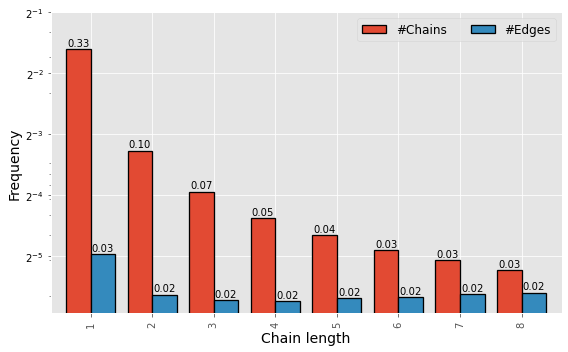

In [86]:
statsFile = 'stats/3DRoadNetwork.arborx_minpts10_stats.log'
plotStatsGrouped(statsFile,ln=8)

hacc_37M-arborx_minpts2_stats
36902718
Total number of chains:  13340495


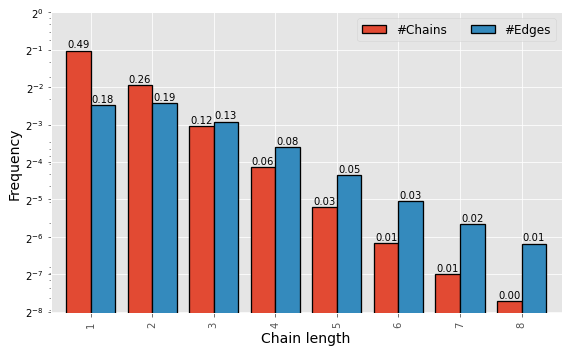

In [87]:
statsFile = 'stats/hacc_37M.arborx_minpts2_stats.log'
plotStatsGrouped(statsFile,ln=8)


hacc_37M-arborx_minpts10_stats
36902718
Total number of chains:  1335662


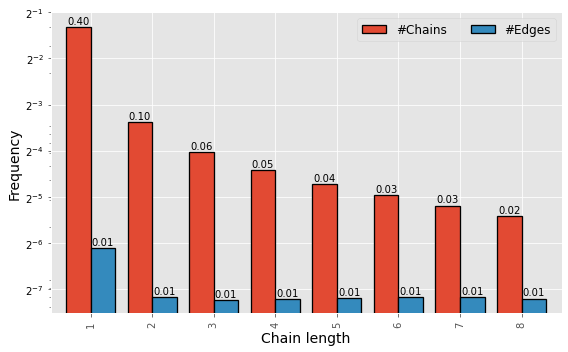

In [88]:
statsFile = 'stats/hacc_37M.arborx_minpts10_stats.log'
plotStatsGrouped(statsFile,ln=8)

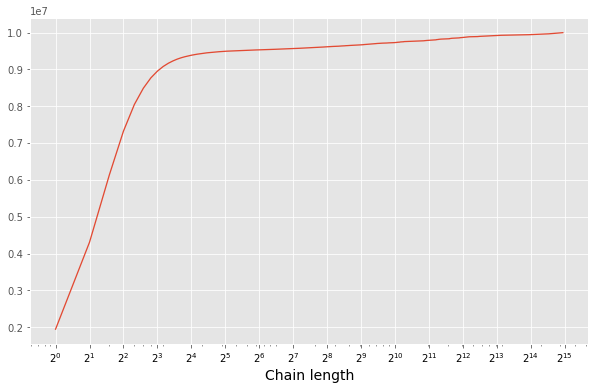

In [29]:
fig,ax = plt.subplots(figsize=(10,6))
ln=10000
ax.plot(data[0:ln,0], np.cumsum(data[0:ln,0]*data[0:ln,1]), lw=1.3)
# ax.bar(data[0:ln,0], np.cumsum(data[0:ln,0]*data[0:ln,1]), edgecolor='k', lw=1.3)
ax.set_xlabel('Chain length', fontsize=14, color = 'k')
ax.set_xticks(data[0:ln,0])
ax.semilogx()
# yticksPower2(ax)
xticksPower2(ax)